In [1]:
# import python libraries
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# read the csv file
df = pd.read_csv('movies.csv')

#Looking the first 5 rows of the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [2]:
# number of records and columns
df.shape

(7668, 15)

In [3]:
# Checking null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
# Another way of checking missing values using Numpy library
for col in df.columns:
    Val_missing = np.mean(df[col].isnull())
    print("{} -> {}%".format(col, Val_missing))
    

name -> 0.0%
rating -> 0.010041731872717789%
genre -> 0.0%
year -> 0.0%
released -> 0.0002608242044861763%
score -> 0.0003912363067292645%
votes -> 0.0003912363067292645%
director -> 0.0%
writer -> 0.0003912363067292645%
star -> 0.00013041210224308815%
country -> 0.0003912363067292645%
budget -> 0.2831246739697444%
gross -> 0.02464788732394366%
company -> 0.002217005738132499%
runtime -> 0.0005216484089723526%


In [5]:
# Data types for the data
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#Finding the sum of missing values
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
#Dropping Nan valule
df.dropna(axis=0, inplace = True)


In [8]:
#Finding the size of the data
df.shape

(5421, 15)

In [9]:
# checking for any duplicate value
Dup_data = df.duplicated().any()
print("Are there duplicated values? ", Dup_data)

Are there duplicated values?  False


In [10]:
# if we have duplicated data we can drop them using the following:
# 1. Dup_data = df.drop_duplicates()
# 2 Dup_data


In [11]:
# Get the overall statistics of the dataset
df.describe(include="all")

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
count,5421,5421,5421,5421.000000,5421,5421.000000,5.421000e+03,5421,5421,5421,5421,5.421000e+03,5.421000e+03,5421,5421.000000
unique,5336,10,15,NaN,2560,NaN,NaN,2063,3205,1845,50,NaN,NaN,1475,NaN
top,Hercules,R,Comedy,NaN,"October 11, 2002 (United States)",NaN,NaN,Woody Allen,Woody Allen,Nicolas Cage,United States,NaN,NaN,Universal Pictures,NaN
freq,3,2597,1496,NaN,7,NaN,NaN,33,32,40,4319,NaN,NaN,330,NaN
mean,NaN,NaN,NaN,2001.661317,NaN,6.392455,1.150661e+05,NaN,NaN,NaN,NaN,3.600917e+07,1.032297e+08,NaN,108.152739
std,NaN,NaN,NaN,10.540908,NaN,0.962730,1.844073e+05,NaN,NaN,NaN,NaN,4.157337e+07,1.873027e+08,NaN,18.115698
min,NaN,NaN,NaN,1980.000000,NaN,1.900000,1.950000e+02,NaN,NaN,NaN,NaN,6.000000e+03,3.090000e+02,NaN,63.000000
25%,NaN,NaN,NaN,1993.000000,NaN,5.800000,1.900000e+04,NaN,NaN,NaN,NaN,1.000000e+07,1.073640e+07,NaN,95.000000
50%,NaN,NaN,NaN,2002.000000,NaN,6.500000,5.200000e+04,NaN,NaN,NaN,NaN,2.180000e+07,3.686941e+07,NaN,105.000000
75%,NaN,NaN,NaN,2011.000000,NaN,7.100000,1.290000e+05,NaN,NaN,NaN,NaN,4.500000e+07,1.124625e+08,NaN,118.000000


In [12]:
# get column names
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [13]:
# finding movies having runtime >= 180
df[df['runtime'] > 180] ["name"]

21                                      Heaven's Gate
115                                              Reds
220                                            Gandhi
231                               Fanny and Alexander
345                                   The Right Stuff
479                       Once Upon a Time in America
1649                               Dances with Wolves
1857                                              JFK
1998                At Play in the Fields of the Lord
2082                                        Malcolm X
2247                                 Schindler's List
2280                                       Gettysburg
2470                                       Wyatt Earp
2749                                            Nixon
2888                                           Hamlet
3045                                          Titanic
3449                                   The Green Mile
3461                                         Magnolia
3858                        

In [14]:
# finding average voting year
avg = df.groupby ('year')["votes"].mean().sort_values(ascending=False)
avg

year
2013    194310.559006
2014    186797.546012
2012    179525.308642
2011    172906.250000
2010    162330.487805
2008    159716.374269
2004    149526.721519
2007    148943.949045
2017    145469.172932
2009    145441.520468
2016    145153.164557
2006    143533.742331
2015    143071.794872
2020    137962.500000
2003    130798.113208
2019    127360.132743
2005    126581.176471
2001    124598.780488
1999    119779.629630
2002    112873.410405
2018    112353.846154
1994    104921.875000
2000    101550.617284
1995     97495.355072
1997     96183.892617
1998     96060.810811
1980     94896.625000
1990     67803.603604
1993     64444.285714
1996     62775.694444
1984     60880.613636
1991     58049.557522
1982     56334.098592
1992     55249.618321
1985     52972.389474
1989     52343.069565
1987     51632.701923
1986     49763.525253
1988     46580.330769
1983     44748.614458
1981     42848.126984
Name: votes, dtype: float64

In [15]:
# find the average rating for each director
df.groupby("director")["score"].mean().sort_values(ascending=False)

director
Roberto Benigni       8.600
Tony Kaye             8.500
Sergio Leone          8.400
Nadine Labaki         8.400
Bob Persichetti       8.400
                      ...  
Jason Friedberg       2.625
Rod Amateau           2.600
Farhad Mann           2.500
Roger Christian       2.500
Vondie Curtis-Hall    2.300
Name: score, Length: 2063, dtype: float64

In [16]:
# finding the legthy movie title and runtime
Top10_len = df.nlargest(10, 'runtime')[["name",'runtime']]\
.set_index("name")


In [17]:
Top10_len

,runtime
name,
Gettysburg,271.0
Hamlet,242.0
Once Upon a Time in America,229.0
Heaven's Gate,219.0
Gods and Generals,219.0
Kabhi Khushi Kabhie Gham...,210.0
The Irishman,209.0
Malcolm X,202.0
The Lord of the Rings: The Return of the King,201.0


<AxesSubplot:xlabel='runtime', ylabel='name'>

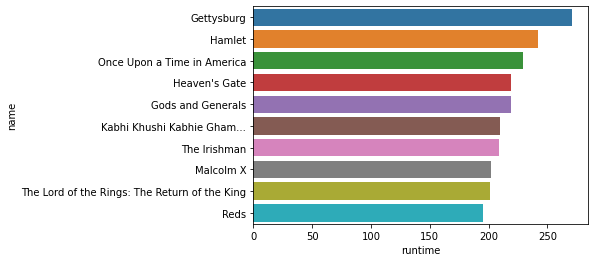

In [18]:
#Visualize the top 10 most viewed movies
sns.barplot(x="runtime", y=Top10_len.index, data = Top10_len)

In [19]:
# Display number of movies per year
df["year"].value_counts()

2002    173
2008    171
2009    171
2005    170
2010    164
2001    164
2014    163
2006    163
2012    162
2000    162
1999    162
2013    161
2011    160
2003    159
2004    158
2016    158
2007    157
2015    156
1997    149
1998    148
1996    144
2018    143
1993    140
1995    138
2017    133
1992    131
1988    130
1994    128
1989    115
1991    113
2019    113
1990    111
1987    104
1986     99
1985     95
1984     88
1983     83
1982     71
1981     63
1980     40
2020      8
Name: year, dtype: int64

In [20]:
#sns.countplot(y = "year", data = df)
#plt.title("Number of Movies Per Year")
#plt.show()

In [21]:
#Changing data type for columns
df["budget"] = df["budget"].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [22]:
df['released'].unique()


array(['June 13, 1980 (United States)', 'July 2, 1980 (United States)',
       'June 20, 1980 (United States)', ...,
       'February 14, 2020 (United States)',
       'February 21, 2020 (United States)',
       'August 28, 2020 (United States)'], dtype=object)

In [23]:
df['released'].value_counts()

October 11, 2002 (United States)     7
October 19, 2007 (United States)     7
August 26, 2016 (United States)      7
January 25, 2002 (United States)     7
December 16, 1983 (United States)    7
                                    ..
March 22, 1991 (United States)       1
May 14, 1993 (United States)         1
July 14, 2010 (United States)        1
April 10, 1998 (United States)       1
November 20, 1992 (United States)    1
Name: released, Length: 2560, dtype: int64

In [24]:
# finding movie type
df['genre'].value_counts()

Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

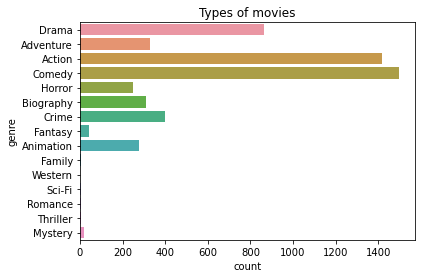

In [25]:
# visualize movie types
sns.countplot(y="genre", data=df)
plt.title("Types of movies")
plt.show()

In [26]:
df['company'].unique()

array(['Warner Bros.', 'Columbia Pictures', 'Lucasfilm', ...,
       'Clubhouse Pictures (II)', '20th Century Studios',
       'Beijing Diqi Yinxiang Entertainment'], dtype=object)

In [27]:
dat = df['company'].value_counts()
dat

Universal Pictures            330
Columbia Pictures             302
Warner Bros.                  298
Paramount Pictures            279
Twentieth Century Fox         209
                             ... 
Sandollar Productions           1
Oscilloscope                    1
Dentsu                          1
Hammerhead Productions          1
Claudie Ossard Productions      1
Name: company, Length: 1475, dtype: int64

In [28]:
# finding the details of a movie with the highest gross revenue
df[df["gross"].max() == df['gross']]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162


In [29]:
#finding the details of a movie with the highest gross revenue
df[df["gross"].max() == df['gross']]['name']

5445    Avatar
Name: name, dtype: object

In [30]:
# Display the top 10 highest rated movies tittles with its directors
Top_10 = df.nlargest(10, "score")[["name", 'score', 'director']]\
.set_index('name')
Top_10

,score,director
name,,
The Shawshank Redemption,9.3,Frank Darabont
The Dark Knight,9.0,Christopher Nolan
Schindler's List,8.9,Steven Spielberg
Pulp Fiction,8.9,Quentin Tarantino
The Lord of the Rings: The Return of the King,8.9,Peter Jackson
Forrest Gump,8.8,Robert Zemeckis
Fight Club,8.8,David Fincher
The Lord of the Rings: The Fellowship of the Ring,8.8,Peter Jackson
Inception,8.8,Christopher Nolan


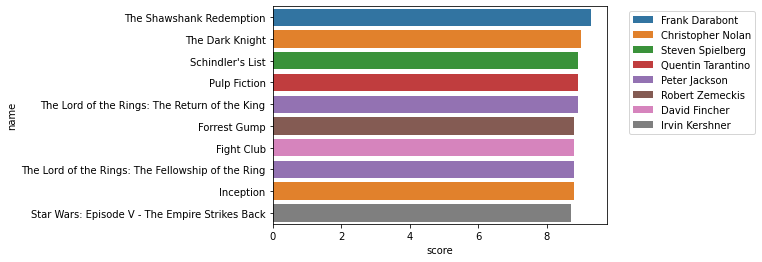

In [31]:
#Visualize Top 10 rated movies
sns.barplot(x='score', y=Top_10.index , data=Top_10, hue='director', dodge= False)
plt.legend(bbox_to_anchor = (1.05,1), loc=2)

In [32]:
# Display Top 10 higest revenue titles
df.nlargest(10, 'gross')['name']

5445                                        Avatar
7445                             Avengers: Endgame
3045                                       Titanic
6663    Star Wars: Episode VII - The Force Awakens
7244                        Avengers: Infinity War
7480                                 The Lion King
6653                                Jurassic World
6043                                  The Avengers
6646                                     Furious 7
7494                                     Frozen II
Name: name, dtype: object

In [33]:
# Display Top 10 higest revenue titles
top_10 = df.nlargest(10, 'gross')[['name','gross']].\
set_index('name')
top_10

,gross
name,
Avatar,2847246203
Avengers: Endgame,2797501328
Titanic,2201647264
Star Wars: Episode VII - The Force Awakens,2069521700
Avengers: Infinity War,2048359754
The Lion King,1670727580
Jurassic World,1670516444
The Avengers,1518815515
Furious 7,1515341399


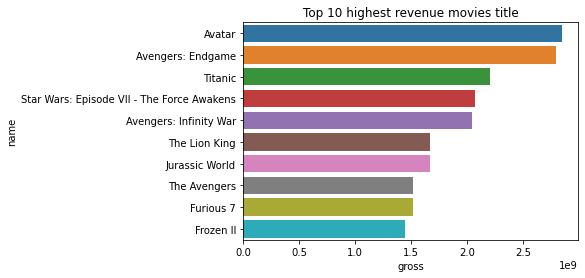

In [34]:
sns.barplot(x='gross', y= top_10.index, data=top_10)
plt.title('Top 10 highest revenue movies title')
plt.show()

In [35]:
#Average rating of the movies year wise
df.groupby('year') ['score'].mean().sort_values(ascending=False)

year
2020    6.612500
2013    6.587578
2016    6.574684
2014    6.558896
2017    6.511278
1980    6.510000
2019    6.507080
2015    6.494872
1982    6.483099
1995    6.471014
2018    6.458741
1985    6.453684
2012    6.442593
2009    6.438596
2007    6.431210
2011    6.428750
1992    6.424427
1999    6.416667
1998    6.416216
1993    6.400714
1984    6.398864
2006    6.394479
1988    6.381538
2010    6.378049
2008    6.376023
2004    6.362025
1990    6.357658
1989    6.346957
1991    6.338938
2001    6.335976
2005    6.335882
1981    6.328571
1994    6.317187
1997    6.300671
1986    6.296970
2002    6.282081
2003    6.256604
1996    6.247917
2000    6.245679
1987    6.217308
1983    6.067470
Name: score, dtype: float64

<AxesSubplot:xlabel='score', ylabel='gross'>

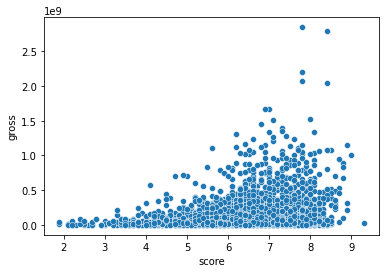

In [36]:
#Does score affect revenue 
sns.scatterplot(x='score', y='gross', data=df)

In [37]:
#classify movies based on score rating as execlent, good , average
def my_rating(score):
    if score > 8.5:
        return "Excellent"
    elif score > 5.5:
        return  "Good"
    else:
        return "Average"
        
df["feedback"] = df["score"].apply(my_rating)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,feedback
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,Good
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,Good
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,Excellent
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,Good
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,Good


In [38]:
# count num of action movies
df["genre"].dtype

dtype('O')

In [39]:
Action_movies = len(df[df["genre"].str.contains('Action', case = False)])

print("The number of action movies are: ", Action_movies)

The number of action movies are:  1415


In [40]:
#Find unique values of genre and how many are they
genre_type = df["genre"].unique()
genre_type


array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Animation', 'Family', 'Western', 'Sci-Fi',
       'Romance', 'Thriller', 'Mystery'], dtype=object)

In [41]:
print ("The unique value size is: ", len(genre_type))

The unique value size is:  15


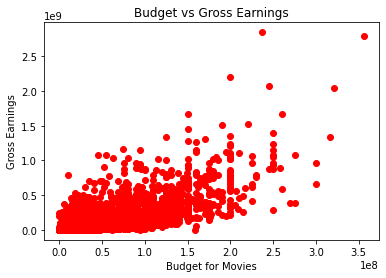

In [42]:
# visualize budget and gross earning
plt.scatter(x=df['budget'], y=df['gross'], color="red")
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Movies')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

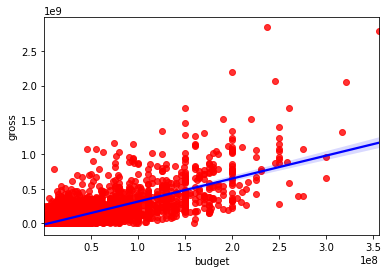

In [43]:
# Visualize budget vs gross in seaborn
#sns.scatterplot(x='budget', y='gross', data=df, color= 'red')

sns.regplot(x='budget', y='gross', data=df, color= 'red', line_kws={"color": "blue"})


In [44]:
# looking at correlation
df.corr(method ='pearson') # we can use methods(pearson, kendall, spearman)
#df.corr(method ='kendall')
#df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


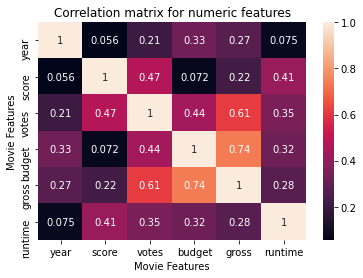

In [45]:
# Visualize correlation matrix
corr_matrix = df.corr(method ='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [46]:
# Looking at companies
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,feedback
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,2
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,2
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,1
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,2
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,2


In [47]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,feedback
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.003290
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.071220
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,0.016125
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.054460
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,0.035200
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.702994
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.155269
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,0.005425
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,0.003516
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,0.024990


In [48]:
#sns.heatmap(df_numerized, annot=True)
#plt.title('Correlation matrix for numeric features')
#plt.xlabel('Movie Features')
#plt.ylabel('Movie Features')
#plt.show()

In [49]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
                        ...   
feedback  budget      0.053059
          gross       0.107640
          company     0.016237
          runtime     0.243503
          feedback    1.000000
Length: 256, dtype: float64

In [50]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
                        ...   
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
feedback  feedback    1.000000
Length: 256, dtype: float64